In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [10]:
df = pd.read_csv('./BTC.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%y')

df = df.sort_values(by='Date', ascending=True)
print(df)
df1=df.reset_index()['Price']

           Date    Price       Open       High        Low     Vol. Change %
2023 2017-12-01  10861.5   9,947.10  10,942.80   9,420.90  131.92K    9.20%
2022 2017-12-02  10912.7  10,861.50  11,175.20  10,715.50   86.83K    0.47%
2021 2017-12-03  11246.2  10,912.70  11,851.10  10,578.40  122.13K    3.06%
2020 2017-12-04  11623.9  11,244.20  11,624.60  10,917.80   93.17K    3.36%
2019 2017-12-05  11667.1  11,624.40  11,901.90  11,486.10   89.69K    0.37%
...         ...      ...        ...        ...        ...      ...      ...
4    2023-06-12  25906.8  25,927.90  26,080.70  25,635.00   40.75K   -0.08%
3    2023-06-13  25929.4  25,906.90  26,428.90  25,726.40   56.24K    0.09%
2    2023-06-14  25129.5  25,929.00  26,051.70  24,847.40   60.82K   -3.08%
1    2023-06-15  25591.3  25,129.50  25,732.80  24,838.00   68.38K    1.84%
0    2023-06-16  25599.1  25,591.90  25,617.50  25,451.40   61.21K    0.03%

[2024 rows x 7 columns]


In [11]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [12]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [13]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [15]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [18]:
# 8. Define LSTM Model

model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
18/18 [==============================] - 26s 475ms/step - loss: 0.0099 - val_loss: 0.0209
Epoch 2/200
18/18 [==============================] - 5s 287ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 3/200
18/18 [==============================] - 5s 270ms/step - loss: 7.1262e-04 - val_loss: 0.0064
Epoch 4/200
18/18 [==============================] - 5s 294ms/step - loss: 6.6762e-04 - val_loss: 0.0029
Epoch 5/200
18/18 [==============================] - 5s 273ms/step - loss: 5.4393e-04 - val_loss: 0.0031
Epoch 6/200
18/18 [==============================] - 5s 274ms/step - loss: 5.1213e-04 - val_loss: 0.0027
Epoch 7/200
18/18 [==============================] - 6s 321ms/step - loss: 5.0915e-04 - val_loss: 0.0031
Epoch 8/200
18/18 [==============================] - 5s 282ms/step - loss: 5.5497e-04 - val_loss: 0.0026
Epoch 9/200
18/18 [==============================] - 5s 291ms/step - loss: 4.8371e-04 - val_loss: 0.0026
Epoch 10/200
18/18 [==============================] - 6s 319ms

Epoch 155/200
18/18 [==============================] - 5s 278ms/step - loss: 1.4796e-04 - val_loss: 0.0212
Epoch 156/200
18/18 [==============================] - 5s 289ms/step - loss: 1.6399e-04 - val_loss: 0.0261
Epoch 157/200
18/18 [==============================] - 5s 281ms/step - loss: 1.4185e-04 - val_loss: 0.0206
Epoch 158/200
18/18 [==============================] - 5s 271ms/step - loss: 1.4592e-04 - val_loss: 0.0094
Epoch 159/200
18/18 [==============================] - 6s 322ms/step - loss: 2.0460e-04 - val_loss: 0.0104
Epoch 160/200
18/18 [==============================] - 6s 320ms/step - loss: 2.0539e-04 - val_loss: 0.0156
Epoch 161/200
18/18 [==============================] - 6s 312ms/step - loss: 1.4429e-04 - val_loss: 0.0201
Epoch 162/200
18/18 [==============================] - 5s 295ms/step - loss: 1.2429e-04 - val_loss: 0.0218
Epoch 163/200
18/18 [==============================] - 6s 315ms/step - loss: 1.3279e-04 - val_loss: 0.0239
Epoch 164/200
18/18 [================

In [23]:
def evaluate_bi_lstm_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [26]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_bi_lstm_model(yval, X_val)

10/10 [==============================] - 1s 50ms/step


In [28]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_bi_lstm_model(ytest, X_test)

10/10 [==============================] - 1s 52ms/step


In [29]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 2s 54ms/step


In [30]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=345
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.28630372 0.28589003 0.28552144 0.27401119 0.26025985 0.25042613
 0.26472025 0.26994582 0.27366437 0.27964889 0.27305005 0.30011415
 0.3138686  0.3108359  0.30986855 0.30243767 0.29909703 0.30098975
 0.2810797  0.28025232 0.30684052 0.3207085  0.31953119 0.31735232
 0.31220762 0.31170683 0.30731176 0.30470208 0.30145632 0.31228227
 0.30662123 0.31021537 0.32018439 0.30977057 0.32246435 0.32203511
 0.32924204 0.32992323 0.32775058 0.32462301 0.32081426 0.31274573
 0.3106555  0.27376079 0.27854468 0.28442811 0.28285888 0.28442811
 0.28206416 0.28517773 0.26471869 0.26135939 0.25383675 0.26543254
 0.25760663 0.26151492 0.26279332 0.26009655 0.25821006 0.26083062
 0.2576144  0.24195791 0.24965785 0.25021618 0.28206416 0.28649968
 0.28936907 0.29808458 0.2635616  0.26429256 0.25619292 0.25775904
 0.26259736 0.25179318 0.25366101 0.24329541 0.23733266 0.25156301
 0.24984448 0.24411657 0.24221919 0.24879003 0.24653961 0.25167187
 0.25450239 0.2518585  0.25013064 0.24609171 0.255

2 day output [[0.39464372]]
3 day input [0.27401119 0.26025985 0.25042613 0.26472025 0.26994582 0.27366437
 0.27964889 0.27305005 0.30011415 0.3138686  0.3108359  0.30986855
 0.30243767 0.29909703 0.30098975 0.2810797  0.28025232 0.30684052
 0.3207085  0.31953119 0.31735232 0.31220762 0.31170683 0.30731176
 0.30470208 0.30145632 0.31228227 0.30662123 0.31021537 0.32018439
 0.30977057 0.32246435 0.32203511 0.32924204 0.32992323 0.32775058
 0.32462301 0.32081426 0.31274573 0.3106555  0.27376079 0.27854468
 0.28442811 0.28285888 0.28442811 0.28206416 0.28517773 0.26471869
 0.26135939 0.25383675 0.26543254 0.25760663 0.26151492 0.26279332
 0.26009655 0.25821006 0.26083062 0.2576144  0.24195791 0.24965785
 0.25021618 0.28206416 0.28649968 0.28936907 0.29808458 0.2635616
 0.26429256 0.25619292 0.25775904 0.26259736 0.25179318 0.25366101
 0.24329541 0.23733266 0.25156301 0.24984448 0.24411657 0.24221919
 0.24879003 0.24653961 0.25167187 0.25450239 0.2518585  0.25013064
 0.24609171 0.25505138 

6 day output [[0.45749074]]
7 day input [0.26994582 0.27366437 0.27964889 0.27305005 0.30011415 0.3138686
 0.3108359  0.30986855 0.30243767 0.29909703 0.30098975 0.2810797
 0.28025232 0.30684052 0.3207085  0.31953119 0.31735232 0.31220762
 0.31170683 0.30731176 0.30470208 0.30145632 0.31228227 0.30662123
 0.31021537 0.32018439 0.30977057 0.32246435 0.32203511 0.32924204
 0.32992323 0.32775058 0.32462301 0.32081426 0.31274573 0.3106555
 0.27376079 0.27854468 0.28442811 0.28285888 0.28442811 0.28206416
 0.28517773 0.26471869 0.26135939 0.25383675 0.26543254 0.25760663
 0.26151492 0.26279332 0.26009655 0.25821006 0.26083062 0.2576144
 0.24195791 0.24965785 0.25021618 0.28206416 0.28649968 0.28936907
 0.29808458 0.2635616  0.26429256 0.25619292 0.25775904 0.26259736
 0.25179318 0.25366101 0.24329541 0.23733266 0.25156301 0.24984448
 0.24411657 0.24221919 0.24879003 0.24653961 0.25167187 0.25450239
 0.2518585  0.25013064 0.24609171 0.25505138 0.26612306 0.26328166
 0.26015876 0.25354281 0.2

10 day output [[0.53146654]]
11 day input [0.30011415 0.3138686  0.3108359  0.30986855 0.30243767 0.29909703
 0.30098975 0.2810797  0.28025232 0.30684052 0.3207085  0.31953119
 0.31735232 0.31220762 0.31170683 0.30731176 0.30470208 0.30145632
 0.31228227 0.30662123 0.31021537 0.32018439 0.30977057 0.32246435
 0.32203511 0.32924204 0.32992323 0.32775058 0.32462301 0.32081426
 0.31274573 0.3106555  0.27376079 0.27854468 0.28442811 0.28285888
 0.28442811 0.28206416 0.28517773 0.26471869 0.26135939 0.25383675
 0.26543254 0.25760663 0.26151492 0.26279332 0.26009655 0.25821006
 0.26083062 0.2576144  0.24195791 0.24965785 0.25021618 0.28206416
 0.28649968 0.28936907 0.29808458 0.2635616  0.26429256 0.25619292
 0.25775904 0.26259736 0.25179318 0.25366101 0.24329541 0.23733266
 0.25156301 0.24984448 0.24411657 0.24221919 0.24879003 0.24653961
 0.25167187 0.25450239 0.2518585  0.25013064 0.24609171 0.25505138
 0.26612306 0.26328166 0.26015876 0.25354281 0.25173408 0.25213844
 0.24737322 0.246199

14 day output [[0.6057725]]
15 day input [0.30243767 0.29909703 0.30098975 0.2810797  0.28025232 0.30684052
 0.3207085  0.31953119 0.31735232 0.31220762 0.31170683 0.30731176
 0.30470208 0.30145632 0.31228227 0.30662123 0.31021537 0.32018439
 0.30977057 0.32246435 0.32203511 0.32924204 0.32992323 0.32775058
 0.32462301 0.32081426 0.31274573 0.3106555  0.27376079 0.27854468
 0.28442811 0.28285888 0.28442811 0.28206416 0.28517773 0.26471869
 0.26135939 0.25383675 0.26543254 0.25760663 0.26151492 0.26279332
 0.26009655 0.25821006 0.26083062 0.2576144  0.24195791 0.24965785
 0.25021618 0.28206416 0.28649968 0.28936907 0.29808458 0.2635616
 0.26429256 0.25619292 0.25775904 0.26259736 0.25179318 0.25366101
 0.24329541 0.23733266 0.25156301 0.24984448 0.24411657 0.24221919
 0.24879003 0.24653961 0.25167187 0.25450239 0.2518585  0.25013064
 0.24609171 0.25505138 0.26612306 0.26328166 0.26015876 0.25354281
 0.25173408 0.25213844 0.24737322 0.24619902 0.24768737 0.25118664
 0.24810729 0.24634832

18 day output [[0.6613642]]
19 day input [0.28025232 0.30684052 0.3207085  0.31953119 0.31735232 0.31220762
 0.31170683 0.30731176 0.30470208 0.30145632 0.31228227 0.30662123
 0.31021537 0.32018439 0.30977057 0.32246435 0.32203511 0.32924204
 0.32992323 0.32775058 0.32462301 0.32081426 0.31274573 0.3106555
 0.27376079 0.27854468 0.28442811 0.28285888 0.28442811 0.28206416
 0.28517773 0.26471869 0.26135939 0.25383675 0.26543254 0.25760663
 0.26151492 0.26279332 0.26009655 0.25821006 0.26083062 0.2576144
 0.24195791 0.24965785 0.25021618 0.28206416 0.28649968 0.28936907
 0.29808458 0.2635616  0.26429256 0.25619292 0.25775904 0.26259736
 0.25179318 0.25366101 0.24329541 0.23733266 0.25156301 0.24984448
 0.24411657 0.24221919 0.24879003 0.24653961 0.25167187 0.25450239
 0.2518585  0.25013064 0.24609171 0.25505138 0.26612306 0.26328166
 0.26015876 0.25354281 0.25173408 0.25213844 0.24737322 0.24619902
 0.24768737 0.25118664 0.24810729 0.24634832 0.24935302 0.25380565
 0.25038414 0.24720681 

22 day output [[0.6780848]]
23 day input [0.31735232 0.31220762 0.31170683 0.30731176 0.30470208 0.30145632
 0.31228227 0.30662123 0.31021537 0.32018439 0.30977057 0.32246435
 0.32203511 0.32924204 0.32992323 0.32775058 0.32462301 0.32081426
 0.31274573 0.3106555  0.27376079 0.27854468 0.28442811 0.28285888
 0.28442811 0.28206416 0.28517773 0.26471869 0.26135939 0.25383675
 0.26543254 0.25760663 0.26151492 0.26279332 0.26009655 0.25821006
 0.26083062 0.2576144  0.24195791 0.24965785 0.25021618 0.28206416
 0.28649968 0.28936907 0.29808458 0.2635616  0.26429256 0.25619292
 0.25775904 0.26259736 0.25179318 0.25366101 0.24329541 0.23733266
 0.25156301 0.24984448 0.24411657 0.24221919 0.24879003 0.24653961
 0.25167187 0.25450239 0.2518585  0.25013064 0.24609171 0.25505138
 0.26612306 0.26328166 0.26015876 0.25354281 0.25173408 0.25213844
 0.24737322 0.24619902 0.24768737 0.25118664 0.24810729 0.24634832
 0.24935302 0.25380565 0.25038414 0.24720681 0.24594707 0.24780868
 0.24846499 0.2541633

27 day output [[0.66004944]]
28 day input [0.30145632 0.31228227 0.30662123 0.31021537 0.32018439 0.30977057
 0.32246435 0.32203511 0.32924204 0.32992323 0.32775058 0.32462301
 0.32081426 0.31274573 0.3106555  0.27376079 0.27854468 0.28442811
 0.28285888 0.28442811 0.28206416 0.28517773 0.26471869 0.26135939
 0.25383675 0.26543254 0.25760663 0.26151492 0.26279332 0.26009655
 0.25821006 0.26083062 0.2576144  0.24195791 0.24965785 0.25021618
 0.28206416 0.28649968 0.28936907 0.29808458 0.2635616  0.26429256
 0.25619292 0.25775904 0.26259736 0.25179318 0.25366101 0.24329541
 0.23733266 0.25156301 0.24984448 0.24411657 0.24221919 0.24879003
 0.24653961 0.25167187 0.25450239 0.2518585  0.25013064 0.24609171
 0.25505138 0.26612306 0.26328166 0.26015876 0.25354281 0.25173408
 0.25213844 0.24737322 0.24619902 0.24768737 0.25118664 0.24810729
 0.24634832 0.24935302 0.25380565 0.25038414 0.24720681 0.24594707
 0.24780868 0.24846499 0.25416335 0.25043546 0.26211835 0.27279966
 0.26538744 0.270076

In [31]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000608  0.021159  0.072695  0.024656
Test      0.016315  0.115749  0.190707  0.127730


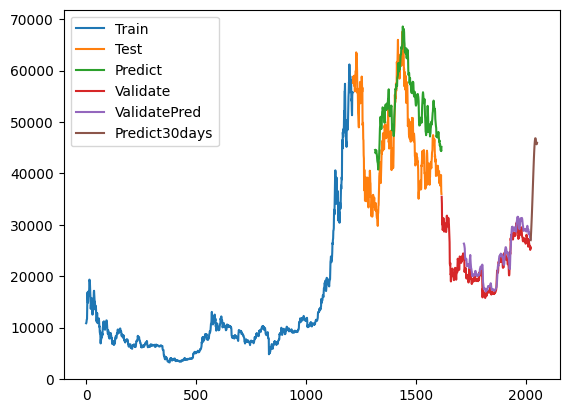

In [32]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [33]:
scaler.inverse_transform(lst_output)

array([[27013.30674982],
       [27758.76276851],
       [28603.97573595],
       [29523.53022299],
       [30506.24865303],
       [31547.70253654],
       [32644.98873129],
       [33786.6690486 ],
       [34966.49837923],
       [36175.38979225],
       [37401.57358503],
       [38637.19690161],
       [39857.516922  ],
       [41044.10300474],
       [42179.38682785],
       [43240.39236813],
       [44205.92956181],
       [45051.97993727],
       [45753.88882275],
       [46298.91688528],
       [46668.77911959],
       [46844.78043957],
       [46829.0095746 ],
       [46648.59701147],
       [46358.4207612 ],
       [46041.76555443],
       [45787.92169781],
       [45669.35085449],
       [45721.74155293],
       [45949.57785435]])